In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [93]:
df=pd.read_csv("C:\\Users\\Hp\\Downloads\\Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [95]:
pd.crosstab(df.type,df.isFraud)

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


Here we can see that max fradulent transactions are through cash_out and transfer

In [96]:
pd.crosstab(df.isFlaggedFraud,df.isFraud)

isFraud,0,1
isFlaggedFraud,,
0,6354407,8197
1,0,16


In [97]:
pd.crosstab(df.step,df.isFraud)

isFraud,0,1
step,,
1,2692,16
2,1006,8
3,548,4
4,555,10
5,659,6
...,...,...
739,0,10
740,0,6
741,0,22


In [98]:
pd.crosstab(df.nameDest,df.isFraud)

isFraud,0,1
nameDest,,
C1000004082,6,0
C1000004940,13,0
C1000013769,13,0
C100001587,9,0
C1000015936,16,0
...,...,...
M999998692,1,0
M99999900,1,0
M999999089,1,0


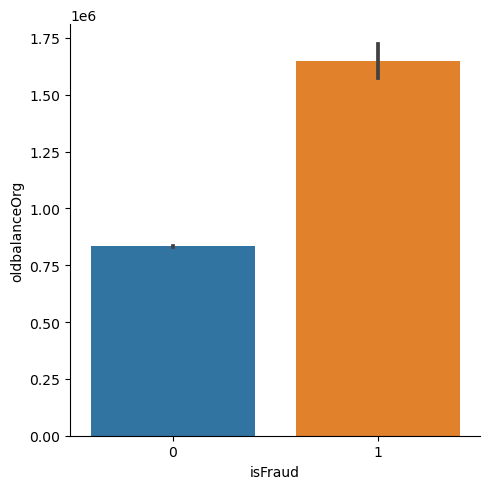

In [115]:
sns.catplot(x="isFraud",y="oldbalanceOrg",data=df,kind="bar")
plt.show()

Here we can see the fradulent transactions are more when the balance in account is more

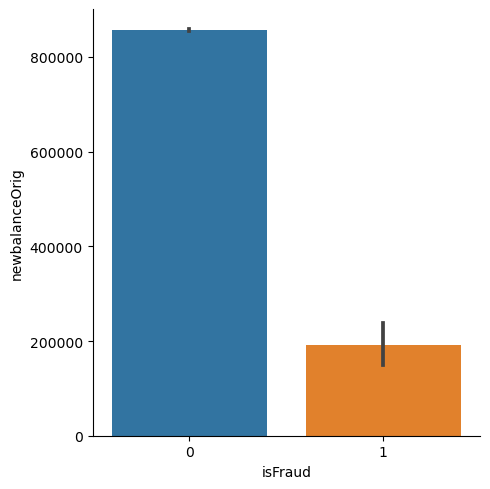

In [116]:
sns.catplot(x="isFraud",y="newbalanceOrig",data=df,kind="bar")
plt.show()

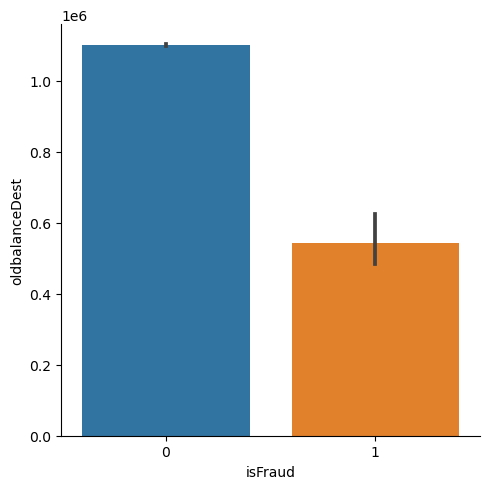

In [117]:
sns.catplot( x="isFraud",y="oldbalanceDest",data=df,kind="bar")
plt.show()

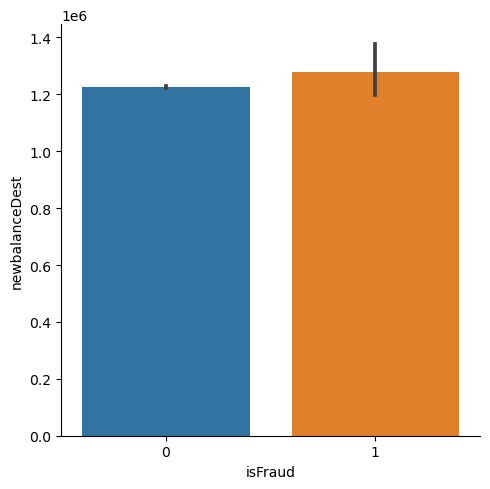

In [118]:
sns.catplot( x="isFraud",y="newbalanceDest",data=df,kind="bar")
plt.show()

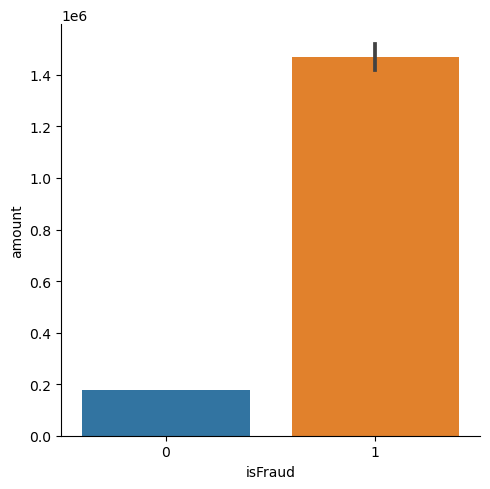

In [119]:
sns.catplot( x="isFraud",y="amount",data=df,kind="bar")
plt.show()

here we can see that the chances of fraud transactions are more when the frequencies of transactions are more

here the important variables are "amount","oldbalanceorg","type" are more important to predict the output.
from this we can conclude that to avoid fradulent transactions we should limit the frquencies of transactions per day,we should limit the cashout per day,we should limit the transfer amount per day, as soon after transaction, message should be sent to account holder in this way we can stop fradulent transactions

In [99]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [100]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [101]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Figure size 1000x1000 with 0 Axes>

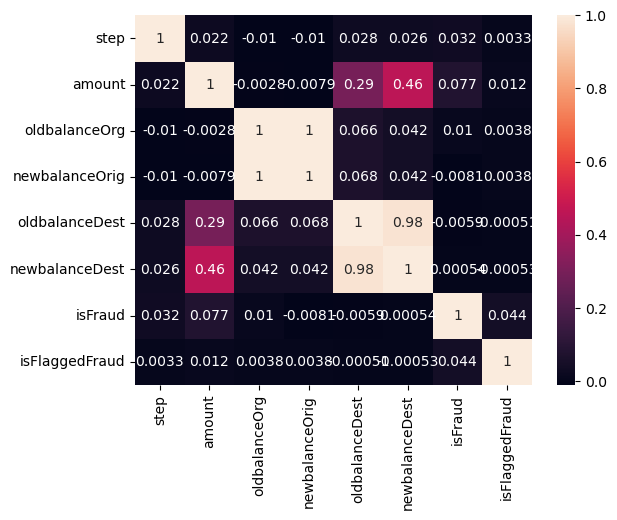

<Figure size 1000x1000 with 0 Axes>

In [102]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(10,10))

Here i have checked whether outlier is there or not and i have replace the outlier by IQR method and saw accuracy decreased thats why i have removed the outlier part

In [103]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["nameOrig"]=le.fit_transform(df["nameOrig"])

In [104]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["nameDest"]=le.fit_transform(df["nameDest"])

In [105]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["type"]=le.fit_transform(df["type"])

As these are categorical data we have to convert into numeric so that machine can understand

In [106]:
df.corr()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006635,0.022373,-0.000146,-0.010058,-0.010299,0.003767,0.027665,0.025888,0.031578,0.003277
type,0.006635,1.000000,0.088419,0.000213,-0.339760,-0.352758,0.584275,-0.104679,-0.059364,0.020833,0.002685
amount,0.022373,0.088419,1.000000,0.000124,-0.002762,-0.007861,-0.169150,0.294137,0.459304,0.076688,0.012295
nameOrig,-0.000146,0.000213,0.000124,1.000000,-0.000648,-0.000675,-0.000256,0.000245,0.000255,-0.000464,0.000667
oldbalanceOrg,-0.010058,-0.339760,-0.002762,-0.000648,1.000000,0.998803,-0.162688,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.352758,-0.007861,-0.000675,0.998803,1.000000,-0.166489,0.067812,0.041837,-0.008148,0.003776
nameDest,0.003767,0.584275,-0.169150,-0.000256,-0.162688,-0.166489,1.000000,-0.198119,-0.203992,-0.021963,-0.001122
oldbalanceDest,0.027665,-0.104679,0.294137,0.000245,0.066243,0.067812,-0.198119,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,-0.059364,0.459304,0.000255,0.042029,0.041837,-0.203992,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.020833,0.076688,-0.000464,0.010154,-0.008148,-0.021963,-0.005885,0.000535,1.000000,0.044109


Here multicollinearity exist,
Here the output variable is more dependent upon "step","type","amount","namedest","isFlaggedfraud" as correlation is high between them


Here "step","type","amount","namedest","isFlaggedfraud" are important variable to predict the transactions is fraudulent or not 

In [107]:
X=df.drop("isFraud",axis=1)
Y=df["isFraud"]

In [108]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [109]:
from imblearn.under_sampling import RandomUnderSampler
rs= RandomUnderSampler(random_state=42)
x,y=rs.fit_resample(X,Y)
print("after undersampling dataset shape")
y.value_counts()

after undersampling dataset shape


0    8213
1    8213
Name: isFraud, dtype: int64

As the data is imbalanced we have to balance it by undersampling of majority class else machine will be biased towards the majority class


In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [111]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [112]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

ypred_train=log_model.predict(x_train)
ypred_test=log_model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(log_model,x,y,cv=5)
print(scores)
scores.mean()


0.9165905631659056
0.9230066950699939
[0.90109556 0.92663623 0.94490107 0.95555556 0.9348554 ]


0.9326087613055156

In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[1536,   94],
       [ 159, 1497]], dtype=int64)

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1630
           1       0.94      0.90      0.92      1656

    accuracy                           0.92      3286
   macro avg       0.92      0.92      0.92      3286
weighted avg       0.92      0.92      0.92      3286

